In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [161]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
uploaded = files.upload()

df = pd.read_csv('money_ball.csv')

Saving money_ball.csv to money_ball (9).csv


In [162]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [163]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [164]:
df['Run_Differential'] = df['RS'] - df['RA']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


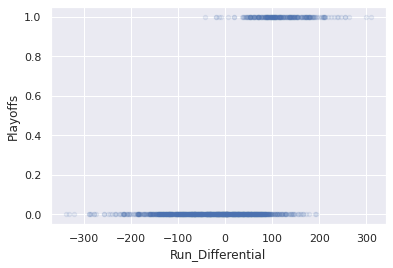

In [165]:
df.plot.scatter('Run_Differential', 'Playoffs', alpha=.1);

In [166]:
X= df.drop(['Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'G','League', 'Team', 'RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG'], axis=1)

In [167]:
X.head()

,Playoffs,Run_Differential
0,0,46
1,1,100
2,1,7
3,0,-72
4,0,-146


In [168]:
X.isnull().sum()


Playoffs            0
Run_Differential    0
dtype: int64

In [169]:
from sklearn.cluster import KMeans


In [170]:
K = range(1,11)

distortion = []
for k in K:
  kmeans = KMeans(k)

In [171]:
for k in K:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  distortion.append(kmeans.inertia_)
distortion

[13005505.675324675,
 4413404.739397103,
 2345544.9505898254,
 1472836.3215506016,
 976100.7144490255,
 707290.6473784123,
 533267.6027449415,
 426834.3027749639,
 345657.01624885516,
 282167.6098928546]

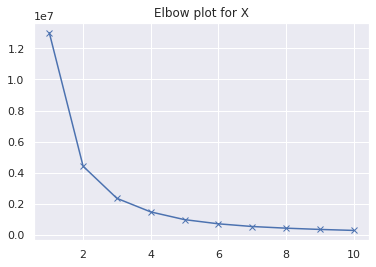

In [172]:
plt.plot(K, distortion, 'bx-')
plt.title("Elbow plot for X")

plt.show()

In [173]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels= kmeans.labels_
print(labels)

[3 3 1 ... 0 0 2]


In [174]:
new_series = pd.Series(labels)
X['clusters'] = new_series.values

X.head()

,Playoffs,Run_Differential,clusters
0,0,46,3
1,1,100,3
2,1,7,1
3,0,-72,1
4,0,-146,2


In [175]:
def get_centroids(X, column_header):
  new_centroids = X.groupby(column_header).mean()
  return new_centroids

In [176]:
centroids = get_centroids(X, 'clusters')

In [177]:
print(centroids)

          Playoffs  Run_Differential
clusters                            
0         0.744444        153.194444
1         0.014742        -38.162162
2         0.000000       -150.299578
3         0.254902         57.789216


In [194]:
print (centroids.iloc[0])


Playoffs              0.744444
Run_Differential    153.194444
Name: 0, dtype: float64


In [269]:
#def plot_clusters(X, column_header, centroids):
#  colors = {0:'green', 1:'orange', 2:'red', 3:'yellow'}
#  fig, ax = plt.subplots()
#  grouped = X.groupby(column_header)
#  for key, group in grouped:
#      group.plot(ax=ax, kind='scatter', x='Run_Differential', y='Playoffs', label=key, color=colors[key])
#  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
#  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
#  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
#  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
#  ax.set_aspect('equal')
#  plt.show()

AttributeError: ignored

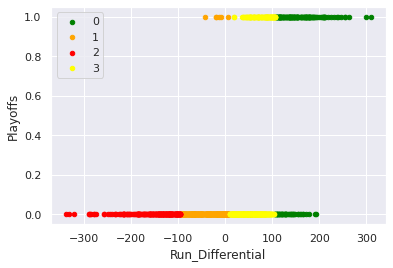

In [271]:
plot_clusters(X, 'clusters', centroids)

In [225]:
#def plot_clusters(X, column_header, centroids):
#  colors = {0:'red', 1:'green', 2:'yellow', 3:'orange'}
#  fig, ax = plt.subplots()
#  ax = sns.scatterplot(x="Run_Differential", y="Playoffs", data=centroids)
#  ax.set_aspect('equal')
#  grouped = X.groupby(column_header)
#  for key, group in grouped:
#      group.plot(ax=ax, kind='scatter', x='Run_Differential', y='Playoffs', label=key, color=colors[key])
#  plt.show()

In [272]:
colors = {0:'green', 1:'orange', 2:'red', 3:'yellow'}


In [284]:
condition = (X['clusters'] == 0)
condition1= (X['clusters'] == 1)
condition2= (X['clusters'] == 2)
condition3= (X['clusters'] == 3)

In [287]:
green = X[condition]
orange= X[condition1]
red= X[condition2]
yellow= X[condition3]

Text(0.5, 1.0, 'Run Differential is highly correlated to making the playoffs')

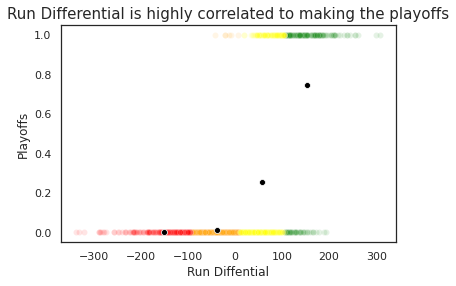

In [299]:
sns.set_style("white")
ax = sns.scatterplot(x="Run_Differential", y="Playoffs", alpha=.1, data=green, color= 'green')
ax = sns.scatterplot(x="Run_Differential", y="Playoffs", alpha=.1, data=orange, color= 'orange')
ax = sns.scatterplot(x="Run_Differential", y="Playoffs", alpha=.1, data=red, color= 'red')
ax = sns.scatterplot(x="Run_Differential", y="Playoffs", alpha=.1, data=yellow, color= 'yellow')
ax = sns.scatterplot(x="Run_Differential", y="Playoffs", data=centroids, color='black')

plt.xlabel('Run Diffential')
plt.ylabel('Playoffs')
plt.title("Run Differential is highly correlated to making the playoffs", fontsize=15)